In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, tree, model_selection
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

<p style font-color = green> Adding iris data and targets into dataframe and concatenating them</p>

In [4]:
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_data.head()

In [5]:
iris_target  = pd.DataFrame(iris.target, columns = ['Target'])

In [6]:
iris_df = pd.concat([iris_data,iris_target], axis= 1)

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## selecting the feature or predictor variables and the target variable

In [8]:
X = iris_df.drop('Target', axis = 1)

In [9]:
y = iris_df['Target']

## Importing the train_test_split function

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut

In [11]:
X_train,X_test,y_train,y_test = \
train_test_split(X,y, random_state = 21, test_size = 0.30, stratify = y)

### Using the KNearestNeighbors model
###### importing the KNearestNeighbors from sklearn.neighbors module
###### building a model by fitting and predicting the model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors= 6)

In [14]:
iris_model = knn.fit(X_train, y_train)

In [15]:
iris_pred = knn.predict(X_test)

In [16]:
iris_pred1 = knn.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
#best acuracy is when test_size = 0.20
test_accuracy = knn.score(X_test, y_test)
test_accuracy

0.9555555555555556

In [19]:
accuracy_score(y_test,iris_pred)

0.9555555555555556

In [20]:
train_accuracy = knn.score(X_train, y_train)
train_accuracy

0.9809523809523809

In [21]:
#Accuracy score tells the accuracy of the model by giving the diff btw the actual_y values and the pred_y values
accuracy_score(y_train,iris_pred1)

0.9809523809523809

In [22]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print(mae(y_train,iris_pred1))
print(mse(y_train, iris_pred1))
#for the mse and mae the closer to zero, the better the prediction

0.01904761904761905
0.01904761904761905


### Cross validating the model using the cross_val_score and the LeaveOneOut cross_val

In [23]:
#using the cross_val_score

cross_val = cross_val_score(knn, X,y, cv = 5)
cross_val
cross_val.mean()

0.9800000000000001

In [24]:
from sklearn.model_selection import LeaveOneOut
#using LeaveOneOut
cross_val1 = cross_val_score(knn, X,y, cv=LeaveOneOut())
cross_val1.mean()

0.96

In [25]:
#using randomisedsearchcv
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
rcv = RandomizedSearchCV(knn,param_grid, cv = 5)
rcv.fit(X,y)
print('Best k_neighbor is {}' .format(rcv.best_params_))
print('The best accuracy for the best n_neighbor is {}'.format(rcv.best_score_))

Best k_neighbor is {'n_neighbors': 6}
The best accuracy for the best n_neighbor is 0.98


In [26]:
#using GRidsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
search = GridSearchCV(knn,param_grid, cv = 5)
search.fit(X,y)
print('Best k_neighbor is {}' .format(search.best_params_))
print('The best accuracy for the best n_neighbor is {}'.format(search.best_score_))


Best k_neighbor is {'n_neighbors': 6}
The best accuracy for the best n_neighbor is 0.98


### plot showing the accuracies of varying n_neighbours for the KNN model

In [27]:
#plt.style.available

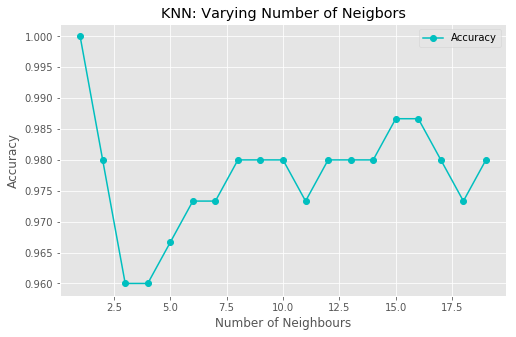

In [28]:
plt.style.use('ggplot')
neighbors = np.arange(1,20)
accuracy = np.empty(len(neighbors))

for i,n in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X,y)
    accuracy[i] = knn.score(X,y)
plt.figure(figsize = [8,5])
plt.plot(neighbors,accuracy, label = 'Accuracy', color = 'c', marker ='o')
plt.title("KNN: Varying Number of Neigbors")
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy');

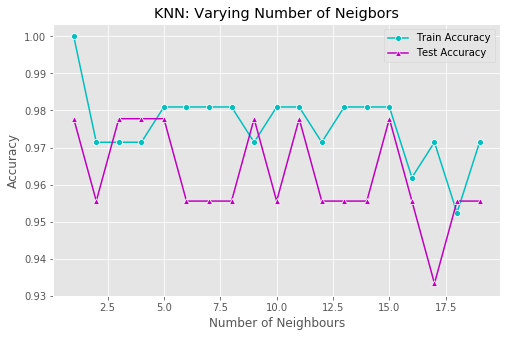

In [29]:
#using seaborn plotting
neighbors = np.arange(1,20)
accuracy_train = np.empty(len(neighbors))
accuracy_test = np.empty(len(neighbors))

for i,n in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    accuracy_test[i] = knn.score(X_test,y_test) #individual test_accuracy score for every n looped
    accuracy_train[i] = knn.score(X_train,y_train) #individual train_accuracy score for every n looped

plt.figure(figsize = [8,5])
sns.lineplot(neighbors,accuracy_train, label = 'Train Accuracy', color = 'c', marker ='o')
sns.lineplot(neighbors,accuracy_test, label ='Test Accuracy', color = 'm', marker = '^')
plt.title("KNN: Varying Number of Neigbors")
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy');


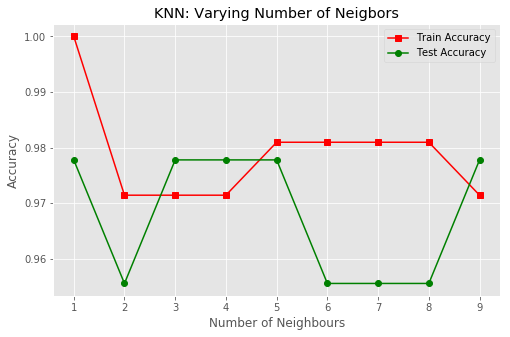

In [30]:
neighbors = np.arange(1,10)
accuracy_train = np.empty(len(neighbors))
accuracy_test = np.empty(len(neighbors))

for i,n in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    accuracy_test[i] = knn.score(X_test,y_test) #individual test_accuracy score for every n looped
    accuracy_train[i] = knn.score(X_train,y_train) #individual train_accuracy score for every n looped

#plt.style.use('classic')
plt.figure(figsize = (8,5), frameon =True)
plt.title("KNN: Varying Number of Neigbors")
plt.plot(neighbors,accuracy_train, 'rs-', label = 'Train Accuracy')
plt.plot(neighbors,accuracy_test, 'go-' ,label ='Test Accuracy',)
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy');
#plt.ylim([0.93,1.004])
#plt.axis([0.7,9.5,0.93,1.005]);
#plt.annotate('overfitting', [2,0.932],);
#smaller n_neighbours leads to overfitting while the larger the n_neighbours the undrfitting the model
#will be. this is bcos the decision boundary with increase in n_neighbours smoothens


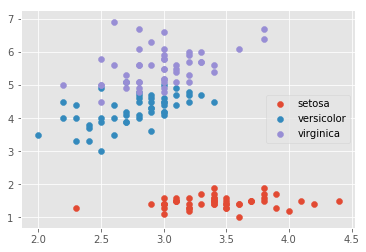

In [31]:
for specie in range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target== specie,1],iris.data[iris.target==specie,2], \
                label= iris.target_names[specie], data = iris_df)
    plt.legend(loc = 'center right')

<Figure size 576x576 with 0 Axes>

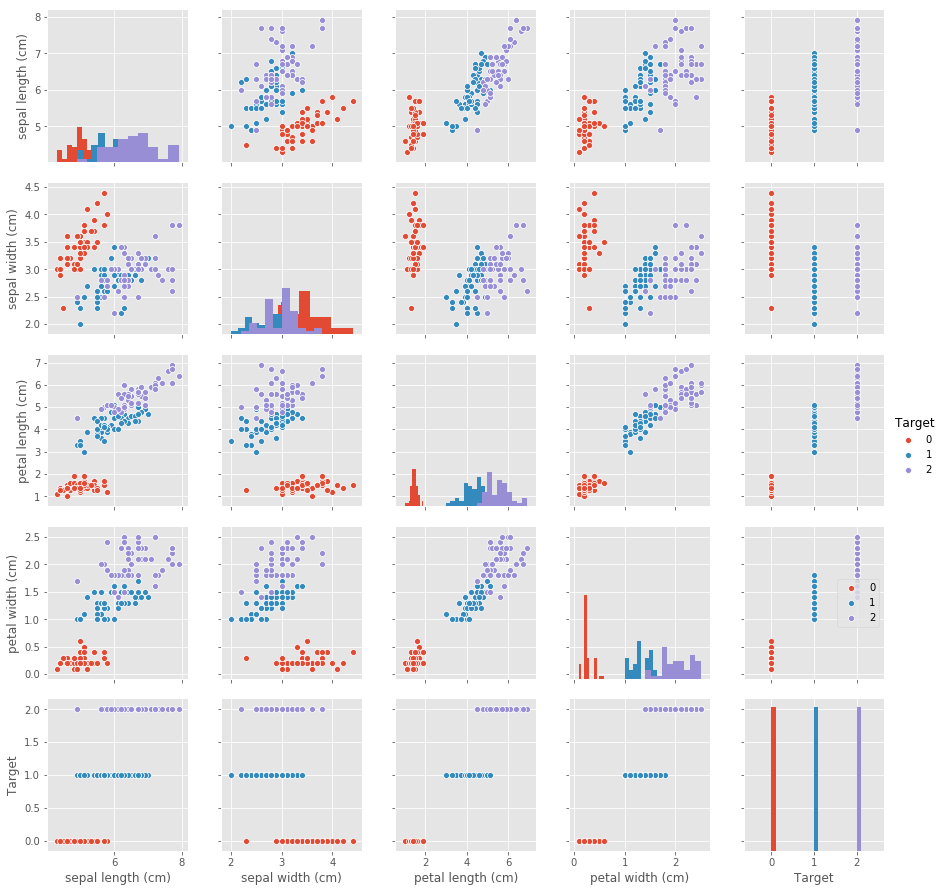

In [32]:
plt.figure(figsize = [8,8])
sns.pairplot(iris_df, diag_kind = 'hist',hue= 'Target')
plt.legend(loc = 5);

### Using the DecisionTree model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
classifier = DecisionTreeClassifier(random_state = 0)

In [35]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
iris_predict = classifier.predict(X_test)

In [37]:
#using the Decisiontree model the best accuracy is when the test_size is 0.4
testaccuracy = classifier.score(X_test,y_test)
testaccuracy

0.9777777777777777

In [38]:
trainaccuracy = classifier.score(X_train,y_train)
trainaccuracy

1.0

In [44]:
def DecisionTree_accuracy():
    testsize = np.round(np.linspace(0.2,0.4, 5),2)
    testAcc = np.empty(len(testsize))
    for i, n in enumerate(testsize):
        X_train, X_test, y_train, y_test = \
        train_test_split(X,y, random_state = 0, stratify = y, test_size = n)
        classifier = DecisionTreeClassifier(random_state = 0)
        classifier.fit(X_train,y_train)
        classifier.predict(X_test)
        testAcc[i] = classifier.score(X_test,y_test)
        print(f'The accuracy of when testsize is {n} is {np.round((testAcc[i]),3)}')
    plt.figure(dpi = 80, figsize = [7,5])
    plt.plot(testsize,testAcc, color = '#1fc212',  marker = 'x', ls = '--', alpha =0.9);
    plt.ylim([0.93,0.98])
    plt.xlabel('Test Size')
    plt.ylabel("Test Accuracy")
    plt.title('Test accuracies at varying test sizes');


The accuracy of when testsize is 0.2 is 0.967
The accuracy of when testsize is 0.25 is 0.974
The accuracy of when testsize is 0.3 is 0.978
The accuracy of when testsize is 0.35 is 0.962
The accuracy of when testsize is 0.4 is 0.95


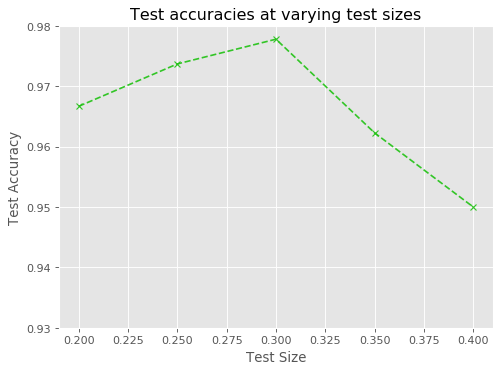

In [45]:
DecisionTree_accuracy()

In [ ]:
# %load DecisionTreeAccuracy_Function.py.
#checks the test size split with the best accuracy

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth= 10, max_leaf_nodes= 14)
rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
print(rfc.score(X_test,y_test))
accuracy_score(y_test, pred_y)

0.9777777777777777


0.9777777777777777

In [72]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(1,100)}
search = GridSearchCV(rfc,param_grid, cv = 5)
search.fit(X,y)
print(f'The best n_estimator is {search.best_params_}')
print(f'The accuracy of the n_estimator is {search.best_score_}')

The best n_estimator is {'n_estimators': 3}
The accuracy of the n_estimator is 0.9666666666666667


In [73]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(1,100)}
search = RandomizedSearchCV(rfc,param_grid, cv = 5)
search.fit(X,y)
print(f'The best n_estimator is {search.best_params_}')
print(f'The accuracy of the n_estimator is {search.best_score_}')

The best n_estimator is {'n_estimators': 81}
The accuracy of the n_estimator is 0.9666666666666667
